In [26]:
import matplotlib.pyplot as plt
from digraph import *
from dag_generator import *
import seaborn as sns
from collections import defaultdict
import time
import pandas as pd

import sys

sys.setrecursionlimit(100000)
sns.set_theme(style="whitegrid")

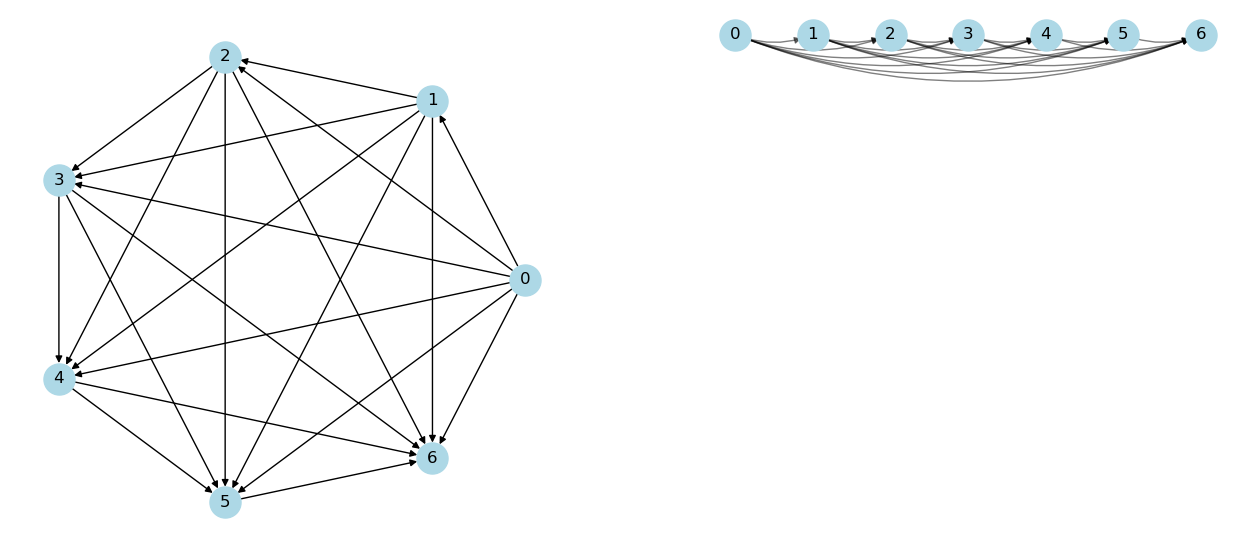

In [3]:

fig, axs = plt.subplots(1, 2, figsize=(16,7))
g, _ = generate_dag(7, edge_probability=1)
g.plot(ax=axs[0])
g.plot_top(ax=axs[1], order=list(range(7)))

plt.axis('off')
plt.show()

## Ordenação Topológica

In [32]:
tempos_de_execucao = []

for n in [10, 100, 1000, 10000]:
    g, _ = generate_dag(n, edge_probability=1)
    for i in range(3):
        # measure time of topological_order
        start = time.time()
        g.topological_order(0)
        end = time.time()
        tempos_de_execucao.append((n, end-start, "completo"))
        print(f"n={n}, i={i}, time={end-start}")

n=10, i=0, time=3.504753112792969e-05
n=10, i=1, time=1.4066696166992188e-05
n=10, i=2, time=7.867813110351562e-06
n=100, i=0, time=0.00022411346435546875
n=100, i=1, time=0.00020503997802734375
n=100, i=2, time=0.00020313262939453125
n=1000, i=0, time=0.09622502326965332
n=1000, i=1, time=0.008272886276245117
n=1000, i=2, time=0.008514165878295898
n=10000, i=0, time=1.033663034439087
n=10000, i=1, time=0.8407187461853027
n=10000, i=2, time=0.8324809074401855


In [33]:
for n in [10, 100, 1000, 10000]:
    for i in range(3):
        g, _ = generate_dag(n, edge_probability=1/n)
        # measure time of topological_order
        start = time.time()
        g.topological_order(0)
        end = time.time()
        tempos_de_execucao.append((n, end-start, "m=1/n"))
        print(f"n={n}, i={i}, time={end-start}")

n=10, i=0, time=7.414817810058594e-05
n=10, i=1, time=2.86102294921875e-06
n=10, i=2, time=3.0994415283203125e-06
n=100, i=0, time=4.76837158203125e-05
n=100, i=1, time=2.1219253540039062e-05
n=100, i=2, time=2.09808349609375e-05
n=1000, i=0, time=0.0005459785461425781
n=1000, i=1, time=0.0004317760467529297
n=1000, i=2, time=0.00030422210693359375
n=10000, i=0, time=0.0055620670318603516
n=10000, i=1, time=0.005354881286621094
n=10000, i=2, time=0.0839548110961914


/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

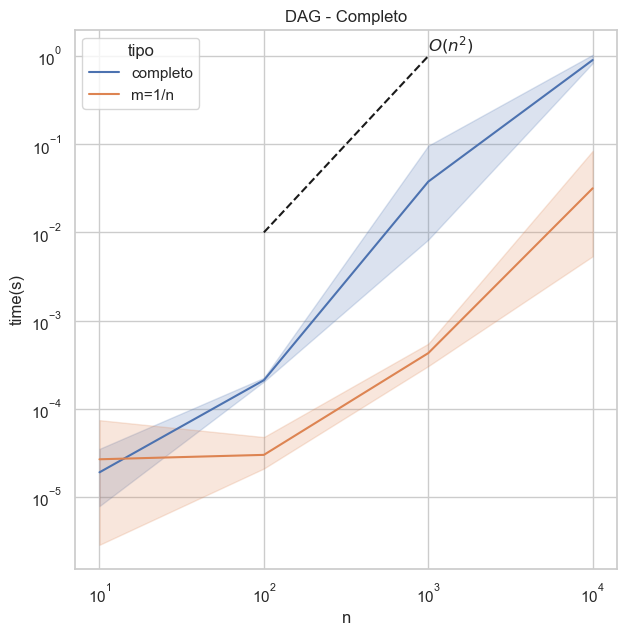

In [34]:
df = pd.DataFrame(tempos_de_execucao, columns=['n', 'time', "tipo"])

fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.lineplot(data=df, x='n', y='time', hue="tipo",ax=ax)

ax.plot([100, 1000], [1/100, 1], color='k', ls="--", label="$O(n^2)$")
ax.text(1000, 1, "$O(n^2)$", va="bottom", ha="left")

ax.set_ylabel("time(s)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("DAG - Completo")
plt.show()


# Kosajuru


In [44]:
def create_complete_graph(n, edge_probability=1):
    g = Digraph(n)
    for i in range(n):
        for j in range(n):
            if i != j and random.random() < edge_probability:
                g.add_edge(i, j)
    return g

In [45]:
tempos_de_execucao_kosajuru = []

for n in [10, 100, 1000, 10000]:
    g = create_complete_graph(n)
    for i in range(3):
        # measure time of topological_order
        start = time.time()
        g.topological_order(0)
        end = time.time()
        tempos_de_execucao_kosajuru.append((n, end-start, "completo"))
        print(f"n={n}, i={i}, time={end-start}")

for n in [10, 100, 1000, 10000]:
    g = create_complete_graph(n, edge_probability=1/n)
    for i in range(3):
        # measure time of topological_order
        start = time.time()
        g.topological_order(0)
        end = time.time()
        tempos_de_execucao_kosajuru.append((n, end-start, "m=1/n"))
        print(f"n={n}, i={i}, time={end-start}")

n=10, i=0, time=3.2901763916015625e-05
n=10, i=1, time=7.867813110351562e-06
n=10, i=2, time=3.814697265625e-06
n=100, i=0, time=0.00022220611572265625
n=100, i=1, time=0.00020194053649902344
n=100, i=2, time=0.00019693374633789062
n=1000, i=0, time=0.020766019821166992
n=1000, i=1, time=0.016515254974365234
n=1000, i=2, time=0.016968965530395508
n=10000, i=0, time=5.356977939605713
n=10000, i=1, time=3.48771595954895


/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

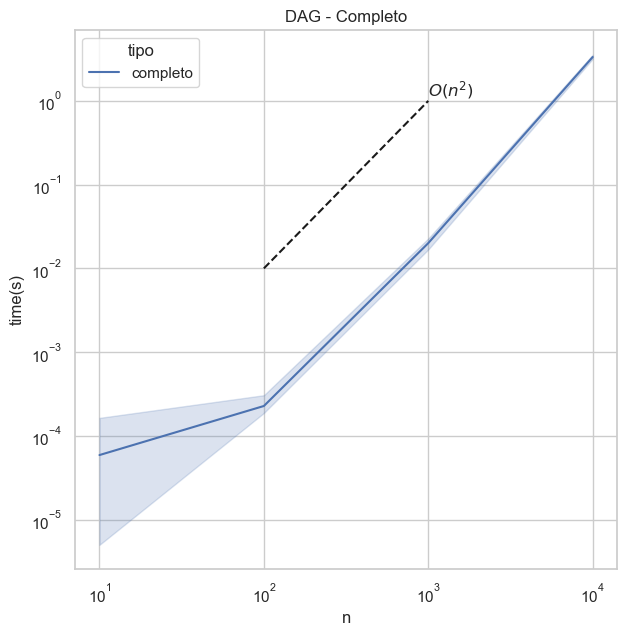

In [42]:
df = pd.DataFrame(tempos_de_execucao_kosajuru, columns=['n', 'time', "tipo"])

fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.lineplot(data=df, x='n', y='time', hue="tipo",ax=ax)

ax.plot([100, 1000], [1/100, 1], color='k', ls="--", label="$O(n^2)$")
ax.text(1000, 1, "$O(n^2)$", va="bottom", ha="left")

ax.set_ylabel("time(s)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Performance do Kosajuru")
plt.show()
